<a href="https://colab.research.google.com/github/CiaraFarrellSETU/-SEM2---Data-Analytics-and-Algorithms/blob/main/Bayesian_Classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Ciara Farrell  
ID:C00294114

This notebook looks at Bayesian Classifiers.  
It is based on Bayes theorem.  
Bayes theorem talks about the probability of an event occuring based the previous knowledge of circumstances which may be relevant to the event.  
Bayes classification is a supervised machine learning algorithm


What can change in Naive Bayesian Classification is:  
* The dataset can be changed.
The x and y values will be assigned based on what dataste is being used.
* The training and test data size is changable depending on what split is needed to imporive the overall accuracy of the model. the split of 0.25:0.75 was used as this split gave the best confusion matrix and accuracy score in comparison to others tried.  
* The type of bayes classification used can change, in this notebook GaussianNB was imported from klearn.naive_bayes .But there is other options depending on the data such as BernoulliNB for multivariate Bernoulli models or CategoricalNB which performs naive bayes classification on categorical data.

**Part A**  
The first part of this notebook looks at Jake VanderPlas' notebook on native bayes classification https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.05-Naive-Bayes.ipynb#scrollTo=fw4lGEBwPPlG .  
Changes are made in my code to give different outputs than Jakes.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

<ipython-input-1-0907bc2e4194>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


Fistly a plot is generated with 300 blobs,3 centers each centre contains 100 data points and has a standard deviation value of 0.8 as the standard deviation gets closer to 0 the more clustered the points become around the cluster center.  
So I choose a value of 0.8 to give a nice spread to the clusters.     
The blobs are then printed at a size 20 on the plot stop the points from overlapping with each other.

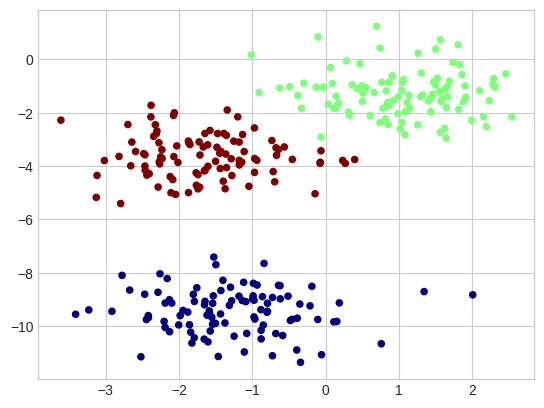

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(300, 2, centers=3, random_state=2, cluster_std=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap='jet');

The gaussian native bayes is then imported from sklearn.  
The model selected is GaussianNB.  
This model that will be fitted to the data.

In [3]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

Generating new data so its class can be predicted.  
The GaussianNB model is applied to the new x values to predict new y values.  
The x data can take a random value will then be multiplied by numpys random number generator rng.rand(d0,d1).  
With d0 = 5000 and d1=2, this means 3000 random corordinates of 2 dimensions.
X new is changed to fit my data points and is [-4,-12] + [10,14].

In [4]:
rng = np.random.RandomState(0)
Xnew = [-4, -12] + [10, 14] * rng.rand(3000, 2)
ynew = model.predict(Xnew)

The newly generated data is then plotted.  
The three boundarys where the data is classified can be clearly seen.  
The data is classified into green, red and blue groups depending on where the point lies on the plot.  
The boundary lines produced by a navie bayes classification is a quadratic line.

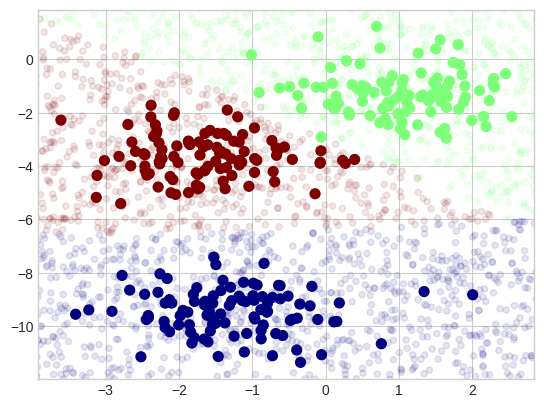

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='jet', alpha=0.1)
plt.axis(lim);

Probabilistic classification can be carried out by using predict_proba.  
This predicts the possibility of a point ending up in a cettain class.  
There is three values in each row as there is three classes.  
The probability across each row adds up to one.  
Only the last tens points predict_proba is printed.  
In the first row the point clearly belongs to class 1.
But taking the second row, The class probabilities for class 0,1,2 are 0,0.99,0.01.  
So the model is 99% sure it is class 1.

In [6]:
yprob = model.predict_proba(Xnew)
yprob[-10:].round(2) #last 10 values

array([[0.  , 1.  , 0.  ],
       [0.  , 0.99, 0.01],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ]])

**PART B**  
Again looks at Jakes notebook and https://github.com/MANRAJSINGH007/Machine-Learning/blob/master/Naive%20Bayes%20Implementation%20with%20Laplace%20correction%20.ipynb   
This notebook does bayes classification with laplace correction.  
This laplace correction can be used for smoothing out the issue of zero probability in machine learning.


Fitting the model.  
There is not much that can be changed yet as it would affect the model.

In [7]:
def fit(X_train,Y_train):
    result ={}
    class_values = set(Y_train)
    for current_class in class_values:
        result[current_class] = {}
        result["total_data"] = len(Y_train)
        current_class_rows = (Y_train == current_class)
        X_train_current = X_train[current_class_rows]
        Y_train_current = Y_train[current_class_rows]
        num_features = X_train.shape[1]
        result[current_class]["total_count"] = len(Y_train_current)
        for j in range(1,num_features+1):
            result[current_class][j] ={}
            all_possible_values = set(X_train[:,j-1])
            for current_value in all_possible_values:
                result[current_class][j][current_value] = (X_train_current[:,j-1] == current_value).sum()
    return result

performing prediction

In [8]:
def probablity(dictionary,x,current_class):
    output= np.log(dictionary[current_class]["total_count"])-np.log(dictionary["total_data"])
    num_features = len(dictionary[current_class].keys())-1;
    for j in range(1,num_features+1):
        xj = x[j-1]
        count_current_class_with_value_xj = dictionary[current_class][j][xj] + 1
        count_current_class = dictionary[current_class]["total_count"] + len(dictionary[current_class][j].keys())
        current_xj_prob = np.log(count_current_class_with_value_xj) -np.log(count_current_class)
        output = output + current_xj_prob
    return output

In [9]:
def predictSinglePoint(dictionary,x):
    classes = dictionary.keys()
    best_p  = -1000
    best_class = -1
    first_run = True
    for current_class in classes:
        if(current_class == "total_data"):
            continue
        p_current_class = probablity(dictionary,x,current_class)
        if(first_run or p_current_class > best_p):
            best_p = p_current_class
            best_class = current_class
        first_run = False
    return best_class

In [10]:
def predict(dictonary, X_test):
    y_pred = []
    for x in X_test:
        x_class = predictSinglePoint(dictionary,x)
        y_pred.append(x_class)
    return y_pred

In [11]:

def makelabelled(column):
    second_limit = column.mean()
    first_limit = 0.5 * second_limit
    third_limit = 1.5 * second_limit
    for i in range(0,len(column)):
        if(column[i]<first_limit):
            column[i] = 0
        elif(column[i] < second_limit):
            column[i] = 1
        elif(column[i]<third_limit):
            column[i] = 2
        else:
            column[i] = 3
    return column

Importing the dataset which was found https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits .  
The variable didgit is applied to the data set.  
X is given the data in regards to the database and y is given the label or class.  


In [12]:
from sklearn.datasets import load_digits
digits = load_digits()
x = digits.data
y = digits.target

The .shape[-1] returns the array dimensions with the last dimension of the array.

In [13]:
for i in range(0,x.shape[-1]):
    x[:,i] = makelabelled(x[:,i])

Setting the train and test subsets.
They are defined by X_train,X_test,Y_train and Y_test.  
To begin with the data is split so the test size is 25% of the overall data gave an accuracy of 0.9083333333333333.
Next 20% train slpit gave an accuracy of 0.9083333333333333 which is the same as 25% split.    
When the test set was 15% of the data it gave a accuracy of 0.9148148148148149.   
When the test set was 10% of the data it gave a accuracy of 0.9166666666666666.
  
Furthermore when a 10% data split was used with a random state of 1 the accuracy imporved again to 0.9388888888888889.

In [50]:
from sklearn import model_selection
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(x,y,test_size=0.10,random_state=1)

In [51]:
dictionary = fit(X_train, Y_train)

the predefined fit is then applied to the X and Y train data

In [55]:
model = dictionary

The prediction of the y values are then predicted by using the model and the x test values

In [56]:
Y_pred = predict(model,X_test)

Finding the accuracy score of the model using the Y_pred and Y_test values.  
In machine learning the accuracy score represents the percentage of correst predictions made by the model.   
The accuracy score is ~0.91 so 91% of predictions completed by the model where correct.

In [54]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_pred,Y_test)
accuracy

0.9388888888888889

Printing the classification report for the trained model.  
The classification report code is from from [https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html].  
The classification report can be used to give a detailed view of how the model performs classification in each class.  
Overall the percission rates are good witht the lowest percision being 9 with a score of 0.91.  
  
Printing the confusion matrix to go with the model classification scores.  
The values along the diagonal starting from top left are the true positive prediction scores.

In [57]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.90      0.95      0.92        19
           2       1.00      0.90      0.95        21
           3       1.00      0.82      0.90        22
           4       1.00      1.00      1.00        18
           5       0.94      0.94      0.94        17
           6       1.00      1.00      1.00        16
           7       0.88      1.00      0.93        21
           8       0.82      0.93      0.87        15
           9       0.82      0.82      0.82        11

    accuracy                           0.94       180
   macro avg       0.94      0.94      0.93       180
weighted avg       0.94      0.94      0.94       180

[[20  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  1  0]
 [ 0  1 19  0  0  0  0  0  0  1]
 [ 0  0  0 18  0  0  0  2  1  1]
 [ 0  0  0  0 18  0  0  0  0  0]
 [ 0  0  0  0  0 16  0  0  1  0]
 [ 0  0  0  0  0  0 16  0  0  0]
 [ 0  0  0